In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm



#jupyter-notebook --no-browser --ip=0.0.0.0 --port 8888

In [2]:
"""
    This notebook performs a simple data analysis using the cleaned slurm data.
    
    """

'\n    This notebook performs a simple data analysis using the cleaned slurm data.\n    \n    '

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
folder_path = Path('./system_analytics_2024/slurm_data')
file_path_parquet_reading_slurm_data= folder_path / 'slurm_data_cleaned.parquet.gzip'

In [4]:
df = pd.read_parquet(file_path_parquet_reading_slurm_data)
# df.rename(columns={"JobID":"Slurm_job_id"}, inplace=True)
df.sample(n=10)


,job_id,Submit,Eligible,Start,End,Elapsed,Slurm_job_id,State,AllocCPUS,TotalCPU,AveRSS,MaxRSS,NodeList
1858,7834206,2024-09-13T22:50:25,2024-09-13T22:50:26,2024-09-13T23:02:20,2024-09-13T23:06:53,00:04:33,7834206_687,COMPLETED,32,01:49:12,None,None,fcn38
0,6129325,2024-05-02T12:40:14,2024-05-02T12:40:14,2024-05-02T12:40:17,2024-05-02T12:50:30,00:10:13,6129325,COMPLETED,18,00:00:00,None,None,gcn28
2,8058188,2024-10-02T23:59:58,2024-10-02T23:59:58,2024-10-02T23:59:58,2024-10-03T00:50:48,00:50:50,8058188.ext+,COMPLETED,48,00:00.001,151K,151K,fcn67
0,4094296,2023-10-11T06:07:23,2023-10-11T06:07:23,2023-10-11T06:07:23,2023-10-11T06:08:07,00:00:44,4094296,FAILED,16,00:00:00,None,None,tcn568
22,8236857,2024-10-22T10:02:17,2024-10-22T10:02:17,2024-10-22T10:02:17,2024-10-22T10:02:53,00:00:36,8236857.19,COMPLETED,1,00:32.381,94194K,94194K,tcn758
1,7739176,2024-09-05T13:28:16,2024-09-05T13:28:16,2024-09-05T13:28:16,2024-09-05T13:59:58,00:31:42,7738901_27.+,FAILED,18,38:02.367,4392870K,4392870K,gcn17
3,8259212,2024-10-24T13:57:32,2024-10-24T13:57:32,2024-10-24T13:57:32,2024-10-24T13:57:37,00:00:05,8259212.0,COMPLETED,192,00:37.187,857189,1777K,tcn1017
0,7366931,2024-08-07T22:48:21,2024-08-07T22:48:22,2024-08-07T22:48:22,2024-08-07T22:52:01,00:03:39,7366853_77,COMPLETED,32,00:00:00,None,None,fcn12
9,6412485,2024-05-28T11:14:00,2024-05-28T11:14:01,2024-05-28T11:14:20,2024-05-28T13:30:36,02:16:16,6412485_9,COMPLETED,16,00:00:00,None,None,tcn387
0,8114228,2024-10-08T11:53:09,2024-10-08T11:53:09,2024-10-08T11:53:11,2024-10-08T11:58:33,00:05:22,8114228,CANCELLED+,16,00:01.338,None,None,tcn1190


In [5]:
""" 
We have a probelm with how pands see the rows in the data frame.
Here we are checking for the number for duplicated rows and get a sample fo them.
While pandas says we have over 1000 of duplicated rows but in the sample we can see that they are not
duplicated at all. ==>needs to be checked
"""

print(f"How many rows are duplicated in pandas view: {df.duplicated().sum()}")
df[df.duplicated()].head()

How many rows are duplicated in pandas view: 1036


,job_id,Submit,Eligible,Start,End,Elapsed,Slurm_job_id,State,AllocCPUS,TotalCPU,AveRSS,MaxRSS,NodeList
2981,7715376,2024-09-03T17:04:29,2024-09-03T17:04:29,2024-09-03T17:04:29,2024-09-03T17:08:21,00:03:52,7715376_799+,COMPLETED,32,00:00.001,146K,146K,fcn62
1034,7720963,2024-09-04T09:55:14,2024-09-04T09:55:14,2024-09-04T09:55:14,2024-09-04T09:57:18,00:02:04,7720963_934+,COMPLETED,32,00:00.001,149K,149K,fcn62
1376,7720963,2024-09-04T09:57:41,2024-09-04T09:57:41,2024-09-04T09:57:41,2024-09-04T10:00:48,00:03:07,7720963_945+,COMPLETED,32,00:00.001,147K,147K,fcn63
1370,7728324,2024-09-04T13:54:18,2024-09-04T13:54:18,2024-09-04T13:54:18,2024-09-04T13:55:52,00:01:34,7728324_134+,COMPLETED,32,00:00.001,149K,149K,fcn40
194,7744649,2024-09-06T13:36:51,2024-09-06T13:36:51,2024-09-06T13:36:51,2024-09-06T13:36:52,00:00:01,7744649_17.+,COMPLETED,1,00:00.359,1535K,1535K,tcn192


In [6]:
"""
    Again we have a probelm here. We are aksing for how many duplicated rows
    we have based on the JobID that slurm returns. It seems that we have more than a million, 
    but it seems that they are not at all
    """

print(f"How many JobIDs are duplicated in pandas view: {df['Slurm_job_id'].duplicated().sum()}")
df[df.duplicated('Slurm_job_id')].head()

How many JobIDs are duplicated in pandas view: 1422706


,job_id,Submit,Eligible,Start,End,Elapsed,Slurm_job_id,State,AllocCPUS,TotalCPU,AveRSS,MaxRSS,NodeList
14,7617959,2024-08-30T12:46:11,2024-08-30T12:46:11,2024-08-30T12:46:11,2024-09-01T01:12:34,1-12:26:23,7617959_13.+,COMPLETED,128,00:00.001,193K,193K,tcn335
26,7617959,2024-08-31T03:17:30,2024-08-31T03:17:30,2024-08-31T03:17:30,2024-09-01T09:29:34,1-06:12:04,7617959_23.+,COMPLETED,128,00:00.001,186K,186K,tcn20
29,7617959,2024-08-31T06:29:24,2024-08-31T06:29:24,2024-08-31T06:29:24,2024-09-01T02:12:39,19:43:15,7617959_24.+,COMPLETED,128,00:00.001,181K,181K,tcn4
32,7617959,2024-08-31T11:53:41,2024-08-31T11:53:41,2024-08-31T11:53:41,2024-09-01T04:05:20,16:11:39,7617959_25.+,COMPLETED,128,00:00.001,181K,181K,tcn83
35,7617959,2024-08-31T22:34:26,2024-08-31T22:34:26,2024-08-31T22:34:26,2024-09-01T02:04:21,03:29:55,7617959_26.+,COMPLETED,128,00:00.001,306K,306K,tcn237


In [7]:
# df.set_index('Slurm_job_id', inplace=True)
# df.sample(n=10)

In [8]:
""" 
Here we check the format for the date columns. Some of the values are not
in the expected format. We focus on the End_match signal on remove those that
does not have the format.
"""

pattern = r"\d{4}-\d{2}-\d{2}[T]\d{2}:\d{2}:\d{2}"

# Check if each timestamp matches the pattern
df['Start_match'] = df['Start'].str.match(pattern)
df['End_match'] = df['End'].str.match(pattern)
df['Submit_match'] = df['Submit'].str.match(pattern)
df['Eligible_match'] = df['Eligible'].str.match(pattern)

print(df['Start_match'].sum(), df['End_match'].sum(),
      df['Submit_match'].sum(), df['Eligible_match'].sum(), len(df))



df = df[df['End_match']]

5649395 5649273 5649395 5649280 5649395


In [9]:

# turn the data column to pandas date column

"""
   Adddd features that you like here and then use them in the next block! 
    """
    

df['Submit'] = pd.to_datetime(df['Submit'])
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
df['job_duration'] = df['End'] - df['Start']

In [10]:
# I would like to see a simple state analysis for this table.

# df_temp = (df.groupby(['State'])['Slurm_job_id']
#  .aggregate(['count']))

# df_temp.reset_index(inplace=True)
# df_temp.rename(columns={"count":"Number_of_jobs"}, inplace=True)
# df_temp['time'] = 10

# plt.figure(figsize=(20, 6))
# sns.barplot(df_temp, x='time', y='Number_of_jobs', hue='State')
# df_temp

/tmp/ipykernel_2899583/3371956076.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp = pd.DataFrame((df.groupby(['cat'])['State'].value_counts(normalize=True)))
/tmp/ipykernel_2899583/3371956076.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_stacked = df_temp.pivot_table(index='cat', columns='State')


<Axes: >

<Figure size 2000x600 with 0 Axes>

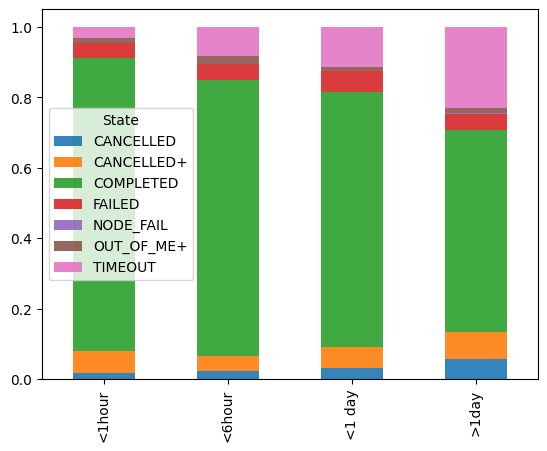

In [11]:
time_for_cutting = [pd.Timedelta('5min'), 
                    pd.Timedelta('1h'), pd.Timedelta('6h'),
                     pd.Timedelta('1day'), pd.Timedelta('500day')]
labels = pd.cut(df['job_duration'], bins=time_for_cutting, right=False)
df['cat'] = labels

# this is exactly the behavior that we want to show.
df_temp = pd.DataFrame((df.groupby(['cat'])['State'].value_counts(normalize=True)))
df_temp.reset_index(inplace=True)


df_stacked = df_temp.pivot_table(index='cat', columns='State')
df_stacked = df_stacked.droplevel(level=0, axis=1).copy()
df_stacked.index.name = ''
df_stacked.index = ['<1hour', '<6hour', '<1 day', '>1day']
plt.figure(figsize=(20, 6))
df_stacked.plot(kind='bar', stacked=True, alpha=0.9)


# sns.barplot(df_temp, x='cat', y='proportion', hue='State' )